# Práctica 10. Visión por computador II

En esta práctica vamos a crear un clasificador capaz de reconocer dígitos manuscritos, para ello utilizaremos el dataset [MNIST](http://yann.lecun.com/exdb/mnist/) que ya hemos utilizado en prácticas anteriores. La parte obligatoria de la práctica se evalúa sobre 6 puntos; además, esta práctica contiene tres ejercicios adicionales incluidos al final de este fichero, y un ejercicio adicional en el notebook adicional. 

Recordad los 5 pasos de un clasificador de imágenes:
1. Preparar el dataset.
2. Separar en conjuntos de entrenamiento, test y validación.
3. Extraer descriptores.
4. Entrenar el modelo.
5. Evaluar el modelo.

En muchas ocasiones los pasos 2 y 3 son intercambiables, y es lo que haremos en esta práctica.

## 0. Carga del dataset y descripción de las imágenes
 
Para cargar el dataset y describir las imágenes vamos a utilizar las clases `CargaYDescribe` (definida en el fichero CargaYDescribe.py de la carpeta p10) y la clase `Descriptor` junto con sus hijas (definidas en el fichero Descriptor.py también dentro de la carpeta p10). Esta carpeta viene incluida en la práctica, pero si quieres trabajar desde Google Drive deberás descargarla y descomprimirla utilizando el siguiente comando. 



In [0]:
!wget www.unirioja.es/cu/joheras/ia/p10/p10.zip
!unzip p10.zip

--2018-05-07 08:21:57--  http://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 964 [application/zip]
Saving to: ‘p10.zip’

p10.zip             100%[===================>]     964  --.-KB/s    in 0s      

2018-05-07 08:21:57 (103 MB/s) - ‘p10.zip’ saved [964/964]

Archive:  p10.zip
   creating: p10/
  inflating: p10/CargaYDescribe.py   
  inflating: p10/Descriptor.py       
  inflating: p10/__init__.py         


Si abres el fichero Descriptor.py, verás la definición de la clase `Descriptor` y de dos clases hijas. La principal característica de la clase `Descriptor` es que tiene un método llamado `describe` que sirve para describir una imagen. Este método es abstracto y lo proporcionan las clases hijas.

##### Pregunta

¿Qué hacen los métodos describe de las clases RawImage y Projection?

In [0]:
RawImage te devuelve un vector de una dimension de la imagen, que se pasa como 
paramentro, en escala de grises.

Projection primero cambia la imagen a la escala de grises si no lo esta ya. 
Despues suma los elementos de cada columna y los mete en data y una vez no 
queden mas columnas, se suman todos los elementos de las filas y se meten 
en data tambien, finalmente se devuelve data.

Si ahora abres el fichero CargaYDescribe.py verás la definición de la clase `CargaYDescribe`. Esta clase permite cargar y describir las imágenes de un directorio que está organizado mediante carpetas donde cada carpeta contiene
las imágenes de una clase.

El constructor de esta clase recibe dos parámetros, un objeto de la clase `Descriptor`, lo que nos permite cambiar fácilmente el método que usamos para describir las imágenes (esta es una técnica llamada inyección de dependencias que ya hemos utilizado alguna vez), y un path que es donde se encuentran las carpetas con las imágenes de cada clase.

Definimos una variable donde almacenamos el path donde se encuentran nuestra imágenes. De nuevo, la carpeta está disponible en el zip de la práctica, pero es necesario descargarlo si se está trabajando en Google Drive.

In [72]:
# Ejecutar solo si se trabaja en Google Drive
!wget www.unirioja.es/cu/joheras/ia/p10/digitos.zip
!unzip digitos.zip

--2018-05-07 09:33:42--  http://www.unirioja.es/cu/joheras/ia/p10/digitos.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176634 (2.1M) [application/zip]
Saving to: ‘digitos.zip.1’

digitos.zip.1       100%[===================>]   2.08M   616KB/s    in 4.6s    

2018-05-07 09:33:47 (465 KB/s) - ‘digitos.zip.1’ saved [2176634/2176634]

Archive:  digitos.zip
replace digitos/0/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [0]:
dataset = "digitos/"

Para este ejemplo vamos a utilizar como descriptor el RawImage. 

In [0]:
from p10.Descriptor import *
from p10.CargaYDescribe import *

descriptor = RawImage()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

##### Ejercicio

Comprueba que puedes cambiar de descriptor y que todo sigue funcionando correctamente.


In [0]:
descriptor2 = Projection()
cargaDatos2 = CargaYDescribe(dataset,descriptor2)
(datos2, etiquetas2) = cargaDatos2.cargaYdescribe()

## 1. Separando el conjunto de entrenamiento y el de test

##### Ejercicio

Utiliza la función train_test_split, vista en las prácticas de aprendizaje automático, para partir el dataset en la siguiente proporción: 75% entrenamiento, 25% test. Almacena la partición en las variables:
`trainData`, `testData`, `trainLabels`, `testLabels`. Utiliza como random_state el valor 84 para así obtener siempre los mismos resultados.

In [0]:
from sklearn.model_selection import train_test_split
(trainData, testData, trainLabels, testLabels) = train_test_split(datos, etiquetas,test_size=0.25, random_state=84)

## 2. Entrenando el modelo

Una vez que hemos partido el banco de imágenes, podemos entrenar distintos modelos como vimos en prácticas anteriores. Por ejemplo, utilizando KNN y aplicando validación cruzada para fijar los hiperparámetros.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

El siguiente código nos sirve para fijar los hiperparámetros pero puede tardar cierto tiempo en finalizar. 

In [0]:
for k in xrange(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.90 (+/- 0.04)
k=3, Precisión: 0.90 (+/- 0.03)
k=5, Precisión: 0.89 (+/- 0.03)
k=7, Precisión: 0.89 (+/- 0.05)
k=9, Precisión: 0.89 (+/- 0.04)
k=11, Precisión: 0.88 (+/- 0.04)
k=13, Precisión: 0.88 (+/- 0.04)
k=15, Precisión: 0.87 (+/- 0.04)
k=17, Precisión: 0.87 (+/- 0.03)
k=19, Precisión: 0.86 (+/- 0.04)
k=21, Precisión: 0.86 (+/- 0.03)
k=23, Precisión: 0.86 (+/- 0.03)
k=25, Precisión: 0.85 (+/- 0.03)


Una vez hayas encontrado los mejores hiperparámetros almacena y entrena el modelo.

In [62]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(trainData,trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

##### Ejercicio

Utiliza otro de los algoritmos de clasificación vistos en las prácticas anteriores para crear un nuevo modelo.

In [0]:
from sklearn.tree import DecisionTreeClassifier
for k in xrange(2,26,1):
    modelDecisionTree = DecisionTreeClassifier(min_samples_split=k)
    scores = cross_val_score(modelDecisionTree,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=2, Precisión: 0.68 (+/- 0.07)
k=3, Precisión: 0.67 (+/- 0.07)
k=4, Precisión: 0.67 (+/- 0.07)
k=5, Precisión: 0.67 (+/- 0.06)
k=6, Precisión: 0.67 (+/- 0.07)
k=7, Precisión: 0.67 (+/- 0.06)
k=8, Precisión: 0.67 (+/- 0.07)
k=9, Precisión: 0.67 (+/- 0.06)
k=10, Precisión: 0.67 (+/- 0.06)
k=11, Precisión: 0.67 (+/- 0.07)
k=12, Precisión: 0.67 (+/- 0.06)
k=13, Precisión: 0.67 (+/- 0.07)
k=14, Precisión: 0.66 (+/- 0.06)
k=15, Precisión: 0.66 (+/- 0.06)
k=16, Precisión: 0.67 (+/- 0.07)
k=17, Precisión: 0.67 (+/- 0.08)
k=18, Precisión: 0.67 (+/- 0.07)
k=19, Precisión: 0.66 (+/- 0.08)
k=20, Precisión: 0.66 (+/- 0.06)
k=21, Precisión: 0.66 (+/- 0.08)
k=22, Precisión: 0.66 (+/- 0.08)
k=23, Precisión: 0.66 (+/- 0.08)
k=24, Precisión: 0.66 (+/- 0.07)
k=25, Precisión: 0.66 (+/- 0.07)


In [63]:
modelDecisionTree = DecisionTreeClassifier(min_samples_split=2)
modelDecisionTree.fit(trainData,trainLabels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
from sklearn.linear_model import LogisticRegression
for k in xrange(1,10,1):
    modelLR = LogisticRegression(C=k)
    scores = cross_val_score(modelLR,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.83 (+/- 0.02)
k=2, Precisión: 0.83 (+/- 0.02)
k=3, Precisión: 0.83 (+/- 0.02)
k=4, Precisión: 0.83 (+/- 0.02)
k=5, Precisión: 0.83 (+/- 0.02)
k=6, Precisión: 0.83 (+/- 0.02)
k=7, Precisión: 0.83 (+/- 0.03)
k=8, Precisión: 0.83 (+/- 0.02)
k=9, Precisión: 0.83 (+/- 0.02)


In [64]:
modelLR = LogisticRegression(C=1)
modelLR.fit(trainData,trainLabels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 3. Evaluando el modelo

Una vez tenemos nuestro modelo construido podemos evaluarlo utilizando la función `classification_report`.

In [0]:
from sklearn.metrics import classification_report
predictions = modelKNN.predict(testData)
print(classification_report(testLabels, predictions))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92        42
          1       0.84      1.00      0.91        66
          2       0.98      0.83      0.90        66
          3       0.93      0.92      0.93        74
          4       0.96      0.93      0.94        71
          5       0.93      0.93      0.93        69
          6       0.97      0.97      0.97        66
          7       0.93      0.97      0.95        58
          8       0.97      0.84      0.90        70
          9       0.91      0.91      0.91        58

avg / total       0.93      0.93      0.93       640



In [0]:
predictions = modelDecisionTree.predict(testData)
print(classification_report(testLabels, predictions))

             precision    recall  f1-score   support

          0       0.80      0.88      0.84        42
          1       0.76      0.92      0.84        66
          2       0.74      0.59      0.66        66
          3       0.69      0.58      0.63        74
          4       0.59      0.66      0.63        71
          5       0.67      0.58      0.62        69
          6       0.70      0.71      0.71        66
          7       0.78      0.79      0.79        58
          8       0.58      0.69      0.63        70
          9       0.65      0.57      0.61        58

avg / total       0.69      0.69      0.69       640



In [0]:
predictions = modelLR.predict(testData)
print(classification_report(testLabels, predictions))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90        42
          1       0.85      0.95      0.90        66
          2       0.84      0.73      0.78        66
          3       0.89      0.77      0.83        74
          4       0.87      0.82      0.84        71
          5       0.86      0.74      0.80        69
          6       0.86      0.97      0.91        66
          7       0.87      0.93      0.90        58
          8       0.73      0.76      0.74        70
          9       0.68      0.76      0.72        58

avg / total       0.83      0.83      0.83       640



También podemos mostrar la matriz de confusión para ver dónde se producen los fallos. 

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testLabels, predictions)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  4, 55,  2,  0,  0,  1,  2,  1,  0],
       [ 0,  1,  0, 68,  0,  1,  0,  1,  1,  2],
       [ 1,  1,  0,  0, 66,  0,  0,  1,  0,  2],
       [ 2,  0,  1,  2,  0, 64,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 64,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 1,  5,  0,  0,  1,  3,  1,  0, 59,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  0,  0, 53]])

## 4. Guardando y cargando el modelo

El proceso de entrenar un modelo puede ser muy costoso, por lo que conviene guardar el modelo para poder recuperarlo posteriormente. Para ello utilizamos la librería `pickle`.

In [0]:
import pickle

La siguiente instrucción guarda el modelo en el fichero modelo.sav.

In [0]:
pickle.dump(modelKNN, open('modelo.sav', 'wb'))

La siguiente instrucción carga el modelo del fichero modelo.sav.

In [0]:
loaded_model = pickle.load(open('modelo.sav', 'rb'))

Ahora podemos usar el modelo igual que antes.

In [0]:
predictions = loaded_model.predict(testData)
print(classification_report(testLabels, predictions))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92        42
          1       0.84      1.00      0.91        66
          2       0.98      0.83      0.90        66
          3       0.93      0.92      0.93        74
          4       0.96      0.93      0.94        71
          5       0.93      0.93      0.93        69
          6       0.97      0.97      0.97        66
          7       0.93      0.97      0.95        58
          8       0.97      0.84      0.90        70
          9       0.91      0.91      0.91        58

avg / total       0.93      0.93      0.93       640



Si estamos trabajando en Google Drive, nos interesa ser capaces de descargar el fichero `modelo.sav` a nuestro ordenador, para lo cual hay que ejecutar las siguientes instrucciones (esta funcionalidad solo está disponible usando como navegador Google Chrome).

In [0]:
from google.colab import files
files.download('modelo.sav') 

##### Ejercicio

Guarda tu mejor modelo en el fichero `mimodelo.sav`.

In [0]:
pickle.dump(modelKNN, open('miModelo.sav', 'wb'))
from google.colab import files
files.download('miModelo.sav') 

## Ejercicios adicionales

###### Ejercicio

Realizar un estudio estadístico utilizando el paquete StatisticalAnalisis visto en la práctica 8. 


In [55]:
import pandas as pd
!wget www.unirioja.es/cu/joheras/StatisticalAnalysis.zip
!unzip StatisticalAnalysis.zip

--2018-05-07 09:23:47--  http://www.unirioja.es/cu/joheras/StatisticalAnalysis.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1363651 (1.3M) [application/zip]
Saving to: ‘StatisticalAnalysis.zip.3’

StatisticalAnalysis 100%[===================>]   1.30M   373KB/s    in 4.4s    

2018-05-07 09:23:52 (303 KB/s) - ‘StatisticalAnalysis.zip.3’ saved [1363651/1363651]

Archive:  StatisticalAnalysis.zip
   creating: StatisticalAnalysis/
  inflating: StatisticalAnalysis/statisticalComparison.py  
  inflating: StatisticalAnalysis/statisticalComparison.pyc  
  inflating: StatisticalAnalysis/__init__.pyc  
  inflating: StatisticalAnalysis/__init__.py  
   creating: StatisticalAnalysis/stac/
  inflating: StatisticalAnalysis/stac/__init__.py  
  inflating: StatisticalAnalysis/stac/unit_tests.py  
  inflating: StatisticalAnalysis/stac/parametric_tests

In [52]:
!pip install tabulate

In [0]:
from StatisticalAnalysis import *

In [0]:
from scipy.stats import randint as sp_randint
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}

temp.csv
['KNN' 'LR' 'Arbol']
Report
**********************************************************
Mean and std
**********************************************************
KNN: 0.914062 (0.018238)
LR: 0.819531 (0.028320)
Arbol: 0.718359 (0.018689)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.909284, p:0.014275
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.851080, p:0.438091
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfilled, applying a non-parametric test
----------------------------------------------------------
Working with more than 2 a

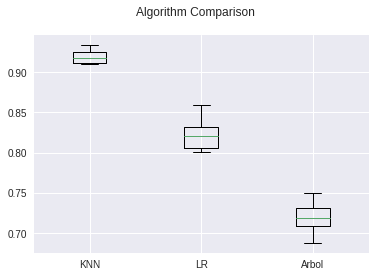

In [94]:
listAlgorithms = [clfTree,clfKNN,clfLR]
listParams = [param_distTree,param_distKNN,param_distLR]
listNames = ["Arbol", "KNN", "LR"]
compare_methods(np.array([x for x in datos]), np.array([x for x in etiquetas]), listAlgorithms,listParams,listNames,metric='accuracy')

##### Ejercicio

En la práctica 7 se proporcionó un fichero que explicaba cómo utilizar la librería `keras` para construir un modelo capaz de predecir los dígitos manuscritos. Utiliza dicha funcionalidad para construir un modelo de predicción. 

In [1]:
from keras.datasets import mnist
(imagenes_entrenamiento,etiquetas_entrenamiento),(imagenes_test,etiquetas_test) = mnist.load_data()

Using TensorFlow backend.


11501568/11490434 [==============================] - 2s 0us/step


In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
imagenes_entrenamiento = imagenes_entrenamiento.reshape((60000,28*28))
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')/255

In [0]:
imagenes_test = imagenes_test.reshape((10000,28*28))
imagenes_test = imagenes_test.astype('float32')/255

In [0]:
from keras.utils import to_categorical
etiquetas_entrenamiento = to_categorical(etiquetas_entrenamiento)
etiquetas_test = to_categorical(etiquetas_test)

In [7]:
network.fit(imagenes_entrenamiento,etiquetas_entrenamiento,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.2599 - acc: 0.9242
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.1045 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0692 - acc: 0.9791
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0501 - acc: 0.9850
Epoch 5/5
 7168/60000 [==>...........................] - ETA: 4s - loss: 0.0329 - acc: 0.9914

60000/60000 [==============================] - 5s 87us/step - loss: 0.0375 - acc: 0.9888


In [8]:
test_loss,test_acc = network.evaluate(imagenes_test,etiquetas_test)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 58us/step
('test_acc:', 0.9772)


##### Ejercicio

El último ejercicio adicional que se propone consiste en combinar la funcionalidad de contornos vista en la práctica 9 y el clasificador de identificación de dígitos. 

Comenzamos cargando las librerías y funcionalidades necesarias. 

In [9]:
!pip install imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline 

  Running setup.py bdist_wheel for imutils ... - done
  Stored in directory: /content/.cache/pip/wheels/cb/58/9b/7debccbc53159611f67cc7e2e3ed37b217e56e9b40e7ba80c3
Successfully built imutils


In [0]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

Cargamos la imagen en la cual queremos leer los dígitos escritos y la mostramos.

--2018-05-10 13:08:50--  http://www.unirioja.es/cu/joheras/ia/p10/imagen1.png
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318579 (311K) [image/png]
Saving to: ‘imagen1.png’

imagen1.png         100%[===================>] 311.11K   112KB/s    in 2.8s    

2018-05-10 13:08:53 (112 KB/s) - ‘imagen1.png’ saved [318579/318579]



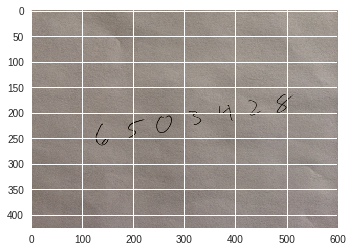

In [11]:
# Descomenta la siguiente instrucción si estás trabajando desde Google Drive
!wget www.unirioja.es/cu/joheras/ia/p10/imagen1.png
image = cv2.imread("imagen1.png")
mostrarImagen(image)

Convierte la imagen a escala de grises.

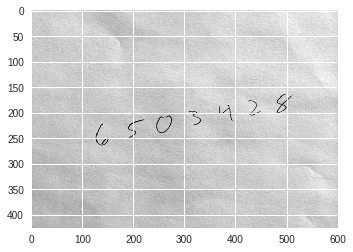

In [12]:
imageGray = cv2.cvtColor(image.copy(),cv2.COLOR_BGR2GRAY)
mostrarImagen(imageGray)

Aplica una umbralización con valor de umbral 80.

Busca los cortornos de la imagen, y para cada uno de ellos encuentra el bounding box que lo contiene. 

In [0]:
threshImage = cv2.threshold(imageGray, 80, 255, cv2.THRESH_BINARY_INV)[1]

Utilizando el bounding box que contiene al contorno, predice el número contenido utilizando el modelo que hayas definido y muestra el resultado en la imagen. Debes tener en cuenta varias cosas, las imágenes del dataset tienen tamaño 28x28, por lo que es posible que tengas que reescalar tu imagen, además en las imágenes el digito aparece en blanco con fondo negro, mientras que en la imagen está justo al revés, por lo que tendrás que invertir los colores. 

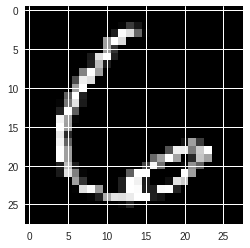

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


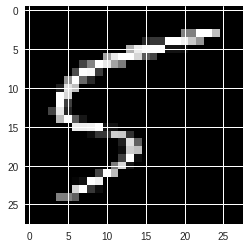

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


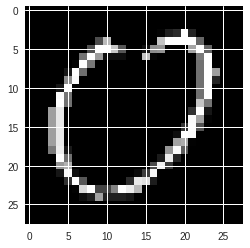

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


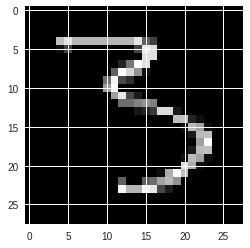

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


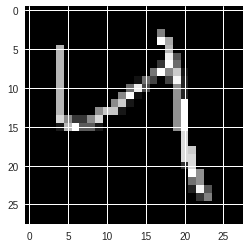

[[0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 2.266988e-28
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


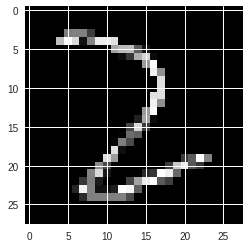

[[0.0000000e+00 0.0000000e+00 9.9999583e-01 4.2230913e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


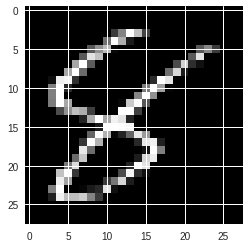

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


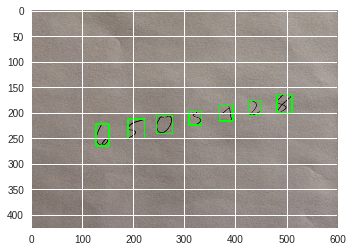

In [34]:
import numpy as np
_,cnts,_ = cv2.findContours(threshImage.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = image.copy()

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    image_crop = threshImage[y-5:y+h+5, x-5:x+w+5]
    resized_image = cv2.resize(image_crop, (28, 28))
    mostrarImagen(resized_image)
    reshapeImage = resized_image.reshape((1,784))
    prediction = network.predict(reshapeImage)
    print(prediction)
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

mostrarImagen(clone)